In [1]:
import pandas as pd

# Charger les données
entsoe_df = pd.read_csv('entsoe_dataset.csv')
solar_df = pd.read_excel('hungary_solar_installed_capacity.xlsx')

print(entsoe_df.head())
print(solar_df.head())


                  Unnamed: 0  \
0  2015-01-01 00:00:00+00:00   
1  2015-01-01 01:00:00+00:00   
2  2015-01-01 02:00:00+00:00   
3  2015-01-01 03:00:00+00:00   
4  2015-01-01 04:00:00+00:00   

   power.ro.generation.biomass.mw.hourly.entsoe.obs.utc  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc  \
0                  

In [2]:
entsoe_df.describe()

,power.ro.generation.biomass.mw.hourly.entsoe.obs.utc,power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc,power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc,power.ro.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc,power.ro.generation.hydro.ror.mw.hourly.entsoe.obs.utc,power.ro.generation.lignite.mw.hourly.entsoe.obs.utc,power.ro.generation.nuclear.mw.hourly.entsoe.obs.utc,power.ro.generation.solar.mw.hourly.entsoe.obs.utc,power.ro.generation.wind.mw.hourly.entsoe.obs.utc,power.hu.generation.biomass.mw.hourly.entsoe.obs.utc,...,power.hu.generation.hydro.ror.mw.hourly.entsoe.obs.utc,power.hu.generation.lignite.mw.hourly.entsoe.obs.utc,power.hu.generation.nuclear.mw.hourly.entsoe.obs.utc,power.hu.generation.other.mw.hourly.entsoe.obs.utc,power.hu.generation.otherrenewable.mw.hourly.entsoe.obs.utc,power.hu.generation.solar.mw.hourly.entsoe.obs.utc,power.hu.generation.waste.mw.hourly.entsoe.obs.utc,power.hu.generation.wind.mw.hourly.entsoe.obs.utc,power.hu.load.total.mw.hourly.entsoe.obs.utc,power.ro.load.total.mw.hourly.entsoe.obs.utc
count,81326.00000,81325.000000,81352.000000,81261.000000,81305.000000,81350.000000,81326.00000,81327.000000,81325.000000,82114.000000,...,82114.000000,82114.000000,82114.000000,82114.000000,82114.000000,40524.000000,82114.000000,80079.000000,82137.000000,81322.000000
mean,53.31856,1158.780929,160.107044,691.408769,1192.735867,1329.763162,1296.74514,155.377014,776.909685,106.178902,...,10.563884,462.528542,1716.505297,72.620106,10.719212,333.073813,14.507149,75.439428,4898.722238,6642.493352
std,13.49478,456.681277,307.708909,415.030136,433.800872,502.671068,231.71505,228.787968,675.392901,27.526971,...,3.873902,180.436172,243.774217,19.252658,3.346207,554.748414,5.537339,74.954727,738.859774,1039.947332
min,14.00000,195.250000,0.000000,0.000000,80.000000,0.000000,0.00000,0.000000,0.000000,12.472500,...,0.450000,0.000000,662.035000,0.010000,2.042500,0.000000,0.000000,0.000000,2700.805000,2928.000000
25%,44.00000,824.000000,50.000000,367.000000,860.500000,991.500000,1352.00000,0.000000,223.750000,89.572500,...,7.390000,328.217500,1444.520000,59.127500,8.447500,0.000000,11.825000,13.747500,4330.192500,5829.750000
50%,54.00000,1176.000000,107.000000,629.000000,1168.000000,1290.143750,1384.75000,3.360000,571.000000,110.437500,...,10.820000,423.767500,1864.295000,73.100000,11.102500,5.983750,14.955000,50.040000,4927.012500,6621.250000
75%,63.16750,1496.000000,171.000000,947.500000,1512.000000,1654.000000,1405.00000,272.375000,1189.000000,122.867500,...,13.675000,607.328750,1922.691875,86.100000,13.355000,490.594375,18.115000,118.093750,5425.660000,7347.717500
max,89.25000,2441.000000,2513.550000,2870.720000,3563.000000,3413.000000,1452.50000,1188.250000,2809.000000,176.385000,...,20.427500,854.262500,1960.255000,395.000000,18.567500,3161.997500,28.872500,430.990000,7147.712500,9728.000000


In [3]:
entsoe_df.isna().sum()

Unnamed: 0                                                          0
power.ro.generation.biomass.mw.hourly.entsoe.obs.utc              813
power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc            814
power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc       787
power.ro.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc      878
power.ro.generation.hydro.ror.mw.hourly.entsoe.obs.utc            834
power.ro.generation.lignite.mw.hourly.entsoe.obs.utc              789
power.ro.generation.nuclear.mw.hourly.entsoe.obs.utc              813
power.ro.generation.solar.mw.hourly.entsoe.obs.utc                812
power.ro.generation.wind.mw.hourly.entsoe.obs.utc                 814
power.hu.generation.biomass.mw.hourly.entsoe.obs.utc               25
power.hu.generation.fossilgas.mw.hourly.entsoe.obs.utc             25
power.hu.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc     52061
power.hu.generation.fossiloil.mw.hourly.entsoe.obs              29944
power.hu.generation.

In [4]:
entsoe_df.rename(columns = {"Unnamed: 0" : "Date"}, inplace = True)

In [5]:
entsoe_df.columns

Index(['Date', 'power.ro.generation.biomass.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.hydro.ror.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.lignite.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.nuclear.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.solar.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.wind.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.biomass.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossilgas.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossiloil.mw.hourly.entsoe.obs',
       'power.hu.generation.geothermal.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
       'power.h

# A : Data manipulation /Resampling

In [6]:
import pandas as pd

# Convertir la colonne de date en datetime
entsoe_df['Date'] = pd.to_datetime(entsoe_df['Date'])

# Ajouter une colonne 'Week' basée sur la semaine de l'année
entsoe_df['Week'] = entsoe_df['Date'].dt.strftime('%Y-%U')

# Liste des colonnes de génération pour la Roumanie et la Hongrie
generation_columns_ro = [
    'power.ro.generation.biomass.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.hydro.ror.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.lignite.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.nuclear.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.solar.mw.hourly.entsoe.obs.utc',
    'power.ro.generation.wind.mw.hourly.entsoe.obs.utc'
]

generation_columns_hu = [
    'power.hu.generation.biomass.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.fossilgas.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.fossiloil.mw.hourly.entsoe.obs',
    'power.hu.generation.geothermal.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.hydro.ror.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.lignite.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.nuclear.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.other.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.otherrenewable.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.solar.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.waste.mw.hourly.entsoe.obs.utc',
    'power.hu.generation.wind.mw.hourly.entsoe.obs.utc'
]

# Fonction pour agréger les données par semaine et par type de génération
def aggregate_weekly(dataframe, country_columns, country_code):
    # Aggréger les données par semaine pour chaque type de génération
    weekly_agg = dataframe.groupby(['Week'])[country_columns].sum().reset_index()
    
    # Ajouter une colonne 'Country'
    weekly_agg['Country'] = country_code
    
    return weekly_agg

# Aggréger les données pour la Roumanie et la Hongrie
romania_weekly = aggregate_weekly(entsoe_df, generation_columns_ro, 'RO')
hungary_weekly = aggregate_weekly(entsoe_df, generation_columns_hu, 'HU')

# Combiner les deux DataFrames
combined_weekly = pd.concat([romania_weekly, hungary_weekly], ignore_index=True)

print(combined_weekly.head())



      Week  power.ro.generation.biomass.mw.hourly.entsoe.obs.utc  \
0  2015-00                                                0.0      
1  2015-01                                                0.0      
2  2015-02                                                0.0      
3  2015-03                                                0.0      
4  2015-04                                                0.0      

   power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc  \
0                                                0.0             
1                                                0.0             
2                         

In [7]:
combined_weekly.columns

Index(['Week', 'power.ro.generation.biomass.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.fossilgas.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.hydro.ror.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.lignite.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.nuclear.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.solar.mw.hourly.entsoe.obs.utc',
       'power.ro.generation.wind.mw.hourly.entsoe.obs.utc', 'Country',
       'power.hu.generation.biomass.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossilgas.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossilhardcoal.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.fossiloil.mw.hourly.entsoe.obs',
       'power.hu.generation.geothermal.mw.hourly.entsoe.obs.utc',
       'power.hu.generation.hydro.reservoir.mw.hourly.entsoe.obs.utc',
    

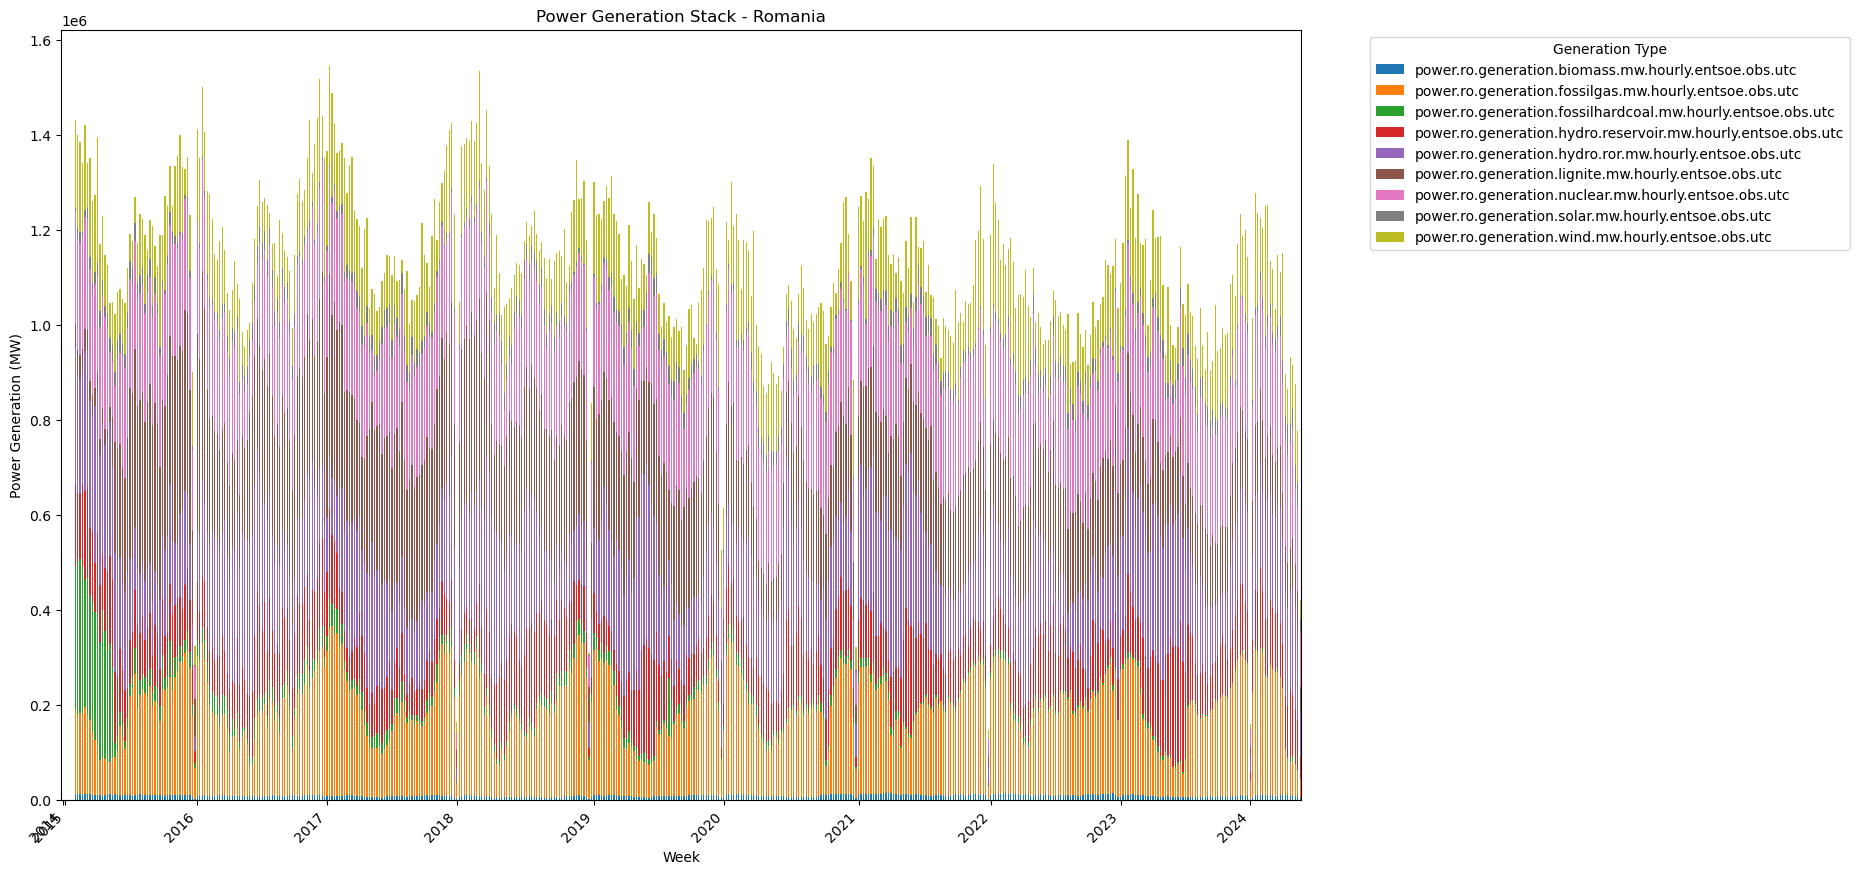

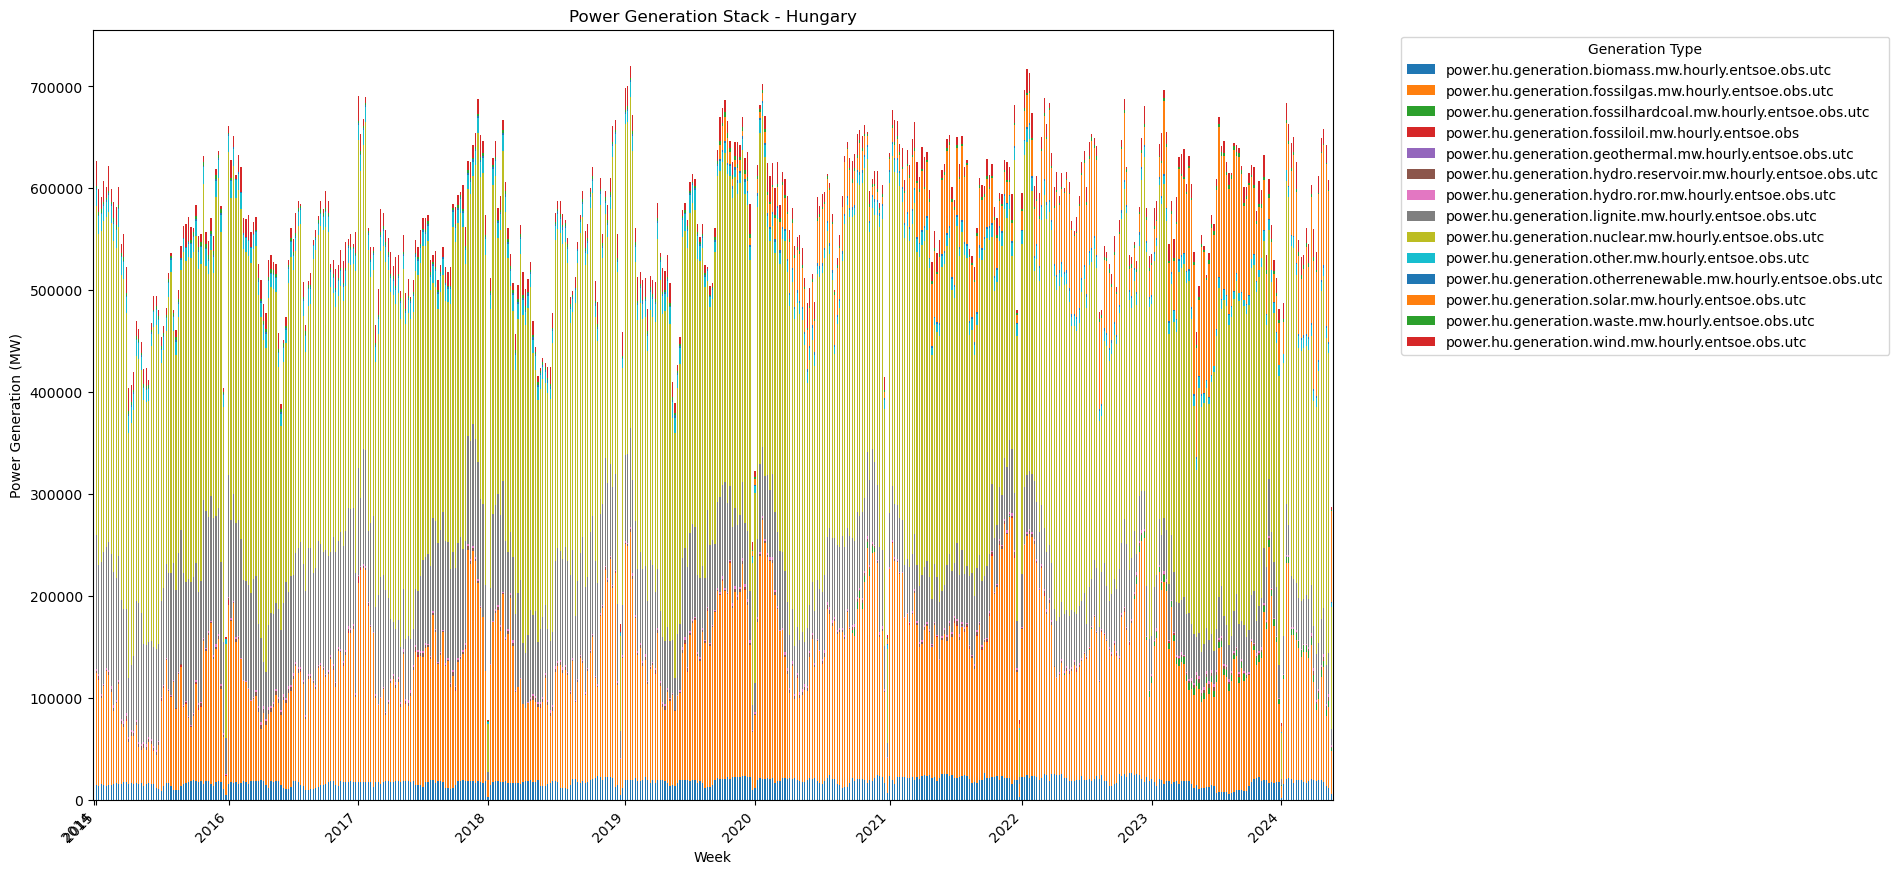

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour la Roumanie et la Hongrie
romania_agg = combined_weekly[combined_weekly['Country'] == 'RO']
hungary_agg = combined_weekly[combined_weekly['Country'] == 'HU']

# Fonction pour extraire l'année d'une date au format 'YYYY-MM-DD'
def extract_year_from_date(date):
    return date.year


# Visualiser les données avec des bar charts pour la Roumanie
plt.figure(figsize=(16, 10))
romania_pivot = romania_agg.set_index('Week')[generation_columns_ro]
romania_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Power Generation Stack - Romania')
plt.xlabel('Week')
plt.ylabel('Power Generation (MW)')

# Convertir les semaines en dates pour obtenir les années correctes
week_dates = pd.to_datetime(romania_agg['Week'] + '-1', format='%Y-%U-%w')
years = [extract_year_from_date(date) for date in week_dates]

# Obtenir les indices où l'année change
year_ticks = [i for i in range(len(years)) if i == 0 or years[i] != years[i - 1]]

# Ajuster les étiquettes de l'axe des abscisses pour ne montrer que les années
plt.xticks(ticks=year_ticks, labels=[years[i] for i in year_ticks], rotation=45, ha='right')


plt.legend(title='Generation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualiser les données avec des stacked bar charts pour la Hongrie
plt.figure(figsize=(16, 10))
hungary_pivot = hungary_agg.set_index('Week')[generation_columns_hu]
hungary_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Power Generation Stack - Hungary')
plt.xlabel('Week')
plt.ylabel('Power Generation (MW)')

# Convertir les semaines en dates pour obtenir les années correctes
week_dates = pd.to_datetime(hungary_agg['Week'] + '-1', format='%Y-%U-%w')
years = [extract_year_from_date(date) for date in week_dates]

# Obtenir les indices où l'année change
year_ticks = [i for i in range(len(years)) if i == 0 or years[i] != years[i - 1]]

# Ajuster les étiquettes de l'axe des abscisses pour ne montrer que les années
plt.xticks(ticks=year_ticks, labels=[years[i] for i in year_ticks], rotation=45, ha='right')

plt.legend(title='Generation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [9]:
data_2023 = entsoe_df[entsoe_df['Date'].dt.year == 2023]

In [10]:
data_2023.columns

# Extraire le jour de la semaine et l'heure
data_2023['DayOfWeek'] = data_2023['Date'].dt.day_name()
data_2023['Hour'] = data_2023['Date'].dt.hour

print(data_2023[['Date', 'DayOfWeek', 'Hour', 'power.ro.load.total.mw.hourly.entsoe.obs.utc']].head())


                           Date DayOfWeek  Hour  \
70127 2023-01-01 00:00:00+00:00    Sunday     0   
70128 2023-01-01 01:00:00+00:00    Sunday     1   
70129 2023-01-01 02:00:00+00:00    Sunday     2   
70130 2023-01-01 03:00:00+00:00    Sunday     3   
70131 2023-01-01 04:00:00+00:00    Sunday     4   

       power.ro.load.total.mw.hourly.entsoe.obs.utc  
70127                                       4814.50  
70128                                       4663.75  
70129                                       4566.75  
70130                                       4520.75  
70131                                       4484.25  


C:\Users\DHajj\AppData\Local\Temp\ipykernel_4232\2070914568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['DayOfWeek'] = data_2023['Date'].dt.day_name()
C:\Users\DHajj\AppData\Local\Temp\ipykernel_4232\2070914568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Hour'] = data_2023['Date'].dt.hour


In [11]:
# Calculer la charge (load) moyenne pour chaque jour de la semaine et chaque heure
average_load = data_2023.groupby(['DayOfWeek', 'Hour'])['power.ro.load.total.mw.hourly.entsoe.obs.utc'].mean().unstack()


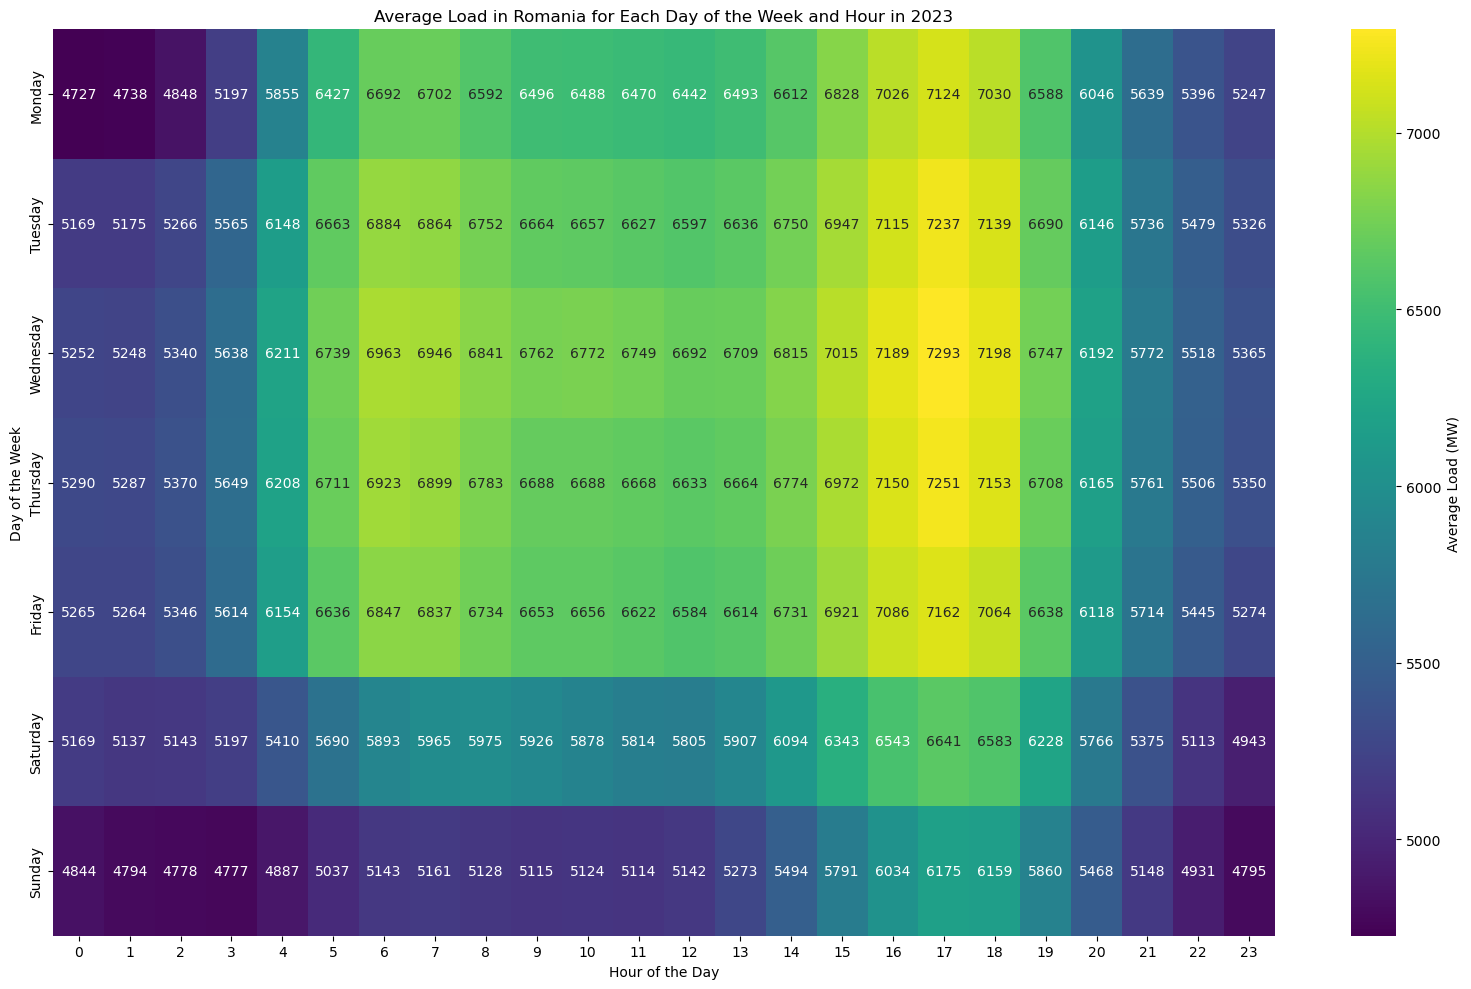

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réorganiser les jours de la semaine pour commencer par lundi
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_load = average_load.reindex(days_order)
average_load = average_load.round().astype(int)
# Créer une carte thermique
plt.figure(figsize=(16, 10))
sns.heatmap(average_load, cmap='viridis', annot=True, fmt="d", cbar_kws={'label': 'Average Load (MW)'})
plt.title('Average Load in Romania for Each Day of the Week and Hour in 2023')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


# B : Romanian Load Forecast

In [22]:

# Convertir la colonne de date en datetime
entsoe_df['Date'] = pd.to_datetime(entsoe_df['Date'])

# Filtrer les données pour la Roumanie
romania_load = entsoe_df[['Date', 'power.ro.load.total.mw.hourly.entsoe.obs.utc']].copy()
romania_load.rename(columns={'power.ro.load.total.mw.hourly.entsoe.obs.utc': 'Load'}, inplace=True)

# Vérifier les données
print(romania_load.head())


                       Date  Load
0 2015-01-01 00:00:00+00:00   NaN
1 2015-01-01 01:00:00+00:00   NaN
2 2015-01-01 02:00:00+00:00   NaN
3 2015-01-01 03:00:00+00:00   NaN
4 2015-01-01 04:00:00+00:00   NaN


In [23]:
romania_load = romania_load.dropna()

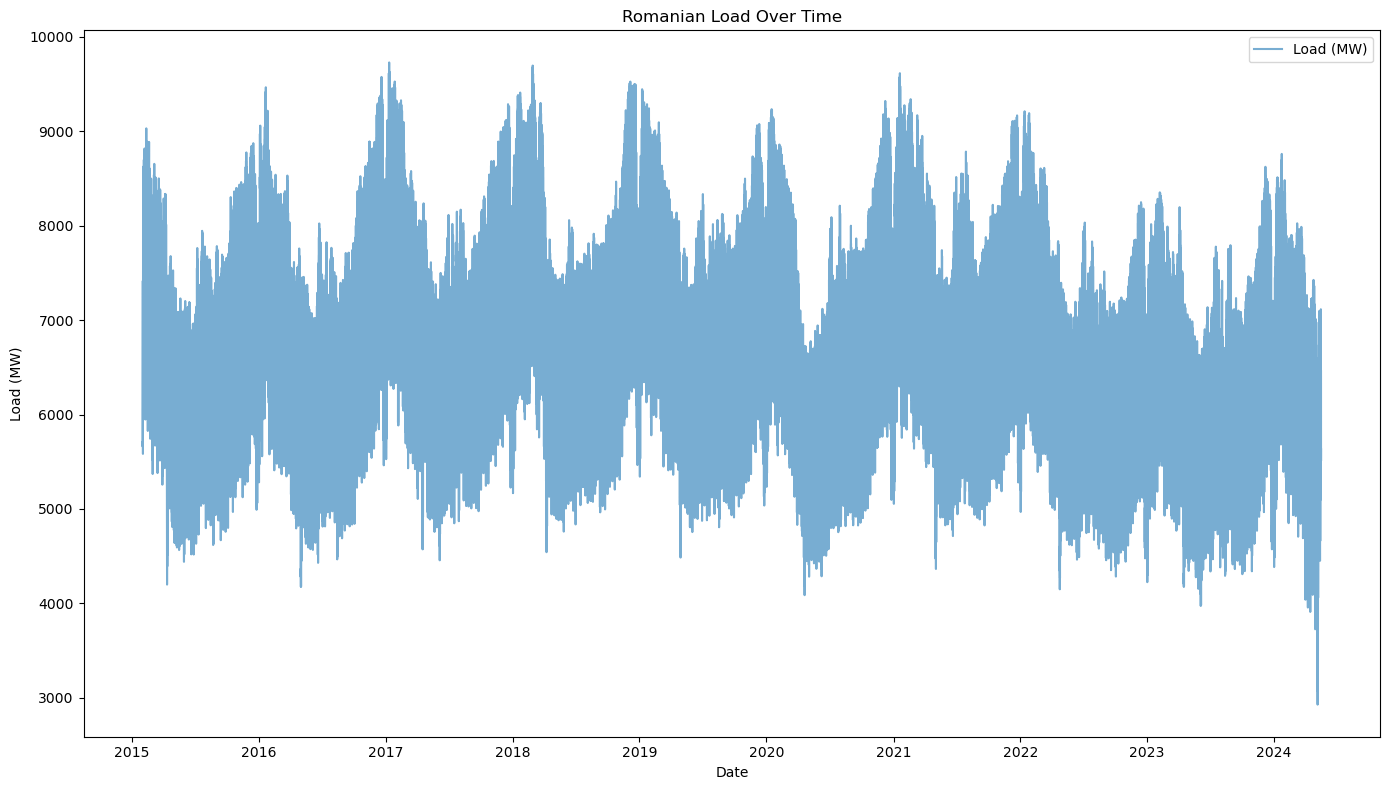

In [24]:
# Créer un plot pour visualiser la load en Roumanie
plt.figure(figsize=(14, 8))
plt.plot(romania_load['Date'], romania_load['Load'], label='Load (MW)', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Romanian Load Over Time')
plt.legend()
plt.tight_layout()
plt.show()


# Random Forest Model 

In [25]:
# Créer des caractéristiques temporelles
romania_load['DayOfWeek'] = romania_load['Date'].dt.dayofweek
romania_load['Hour'] = romania_load['Date'].dt.hour
romania_load['DayOfYear'] = romania_load['Date'].dt.dayofyear
romania_load['Year'] = romania_load['Date'].dt.year

# Filtrer les données pour les années de formation et de test
train_data = romania_load[romania_load['Year'] < 2022]
#train_data = romania_load.copy()
test_data = romania_load[(romania_load['Year'] >= 2022) & (romania_load['Year'] < 2024)]

# Séparer les caractéristiques et la cible
features = ['DayOfWeek', 'Hour', 'DayOfYear']
X_train = train_data[features]
y_train = train_data['Load']
X_test = test_data[features]
y_test = test_data['Load']

# Vérifier les ensembles
print(X_train.head())
print(y_train.head())


     DayOfWeek  Hour  DayOfYear
743          6     0         32
744          6     1         32
745          6     2         32
746          6     3         32
747          6     4         32
743    5708.0
744    5661.0
745    5700.0
746    5797.0
747    5913.0
Name: Load, dtype: float64


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Définir et entraîner le modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Faire des prévisions sur les données de test
test_data['Forecast'] = rf_model.predict(X_test)


C:\Users\DHajj\AppData\Local\Temp\ipykernel_4232\1625821880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast'] = rf_model.predict(X_test)


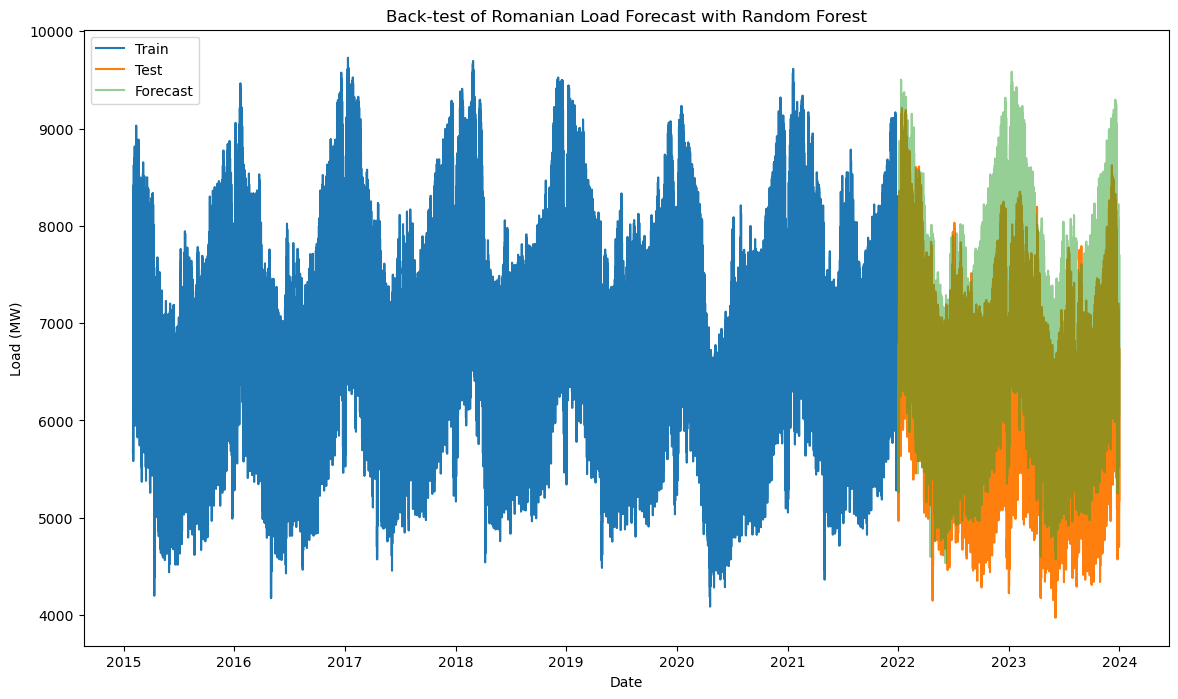

In [27]:

# Visualiser les résultats
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(train_data['Date'], train_data['Load'], label='Train')
plt.plot(test_data['Date'], test_data['Load'], label='Test')
plt.plot(test_data['Date'], test_data['Forecast'], label='Forecast', alpha = 0.5)
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Back-test of Romanian Load Forecast with Random Forest')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculer les métriques de performance
mse = round(mean_squared_error(y_test, test_data['Forecast']))
rmse = round(np.sqrt(mse))
mae = round(mean_absolute_error(y_test, test_data['Forecast']))
mape = np.mean(np.abs((y_test - test_data['Forecast']) / y_test)) * 100
mape_rounded = round(mape,2)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape_rounded}%')


Mean Squared Error: 568367
Root Mean Squared Error: 754
Mean Absolute Error: 639
Mean Absolute Percentage Error: 10.6%


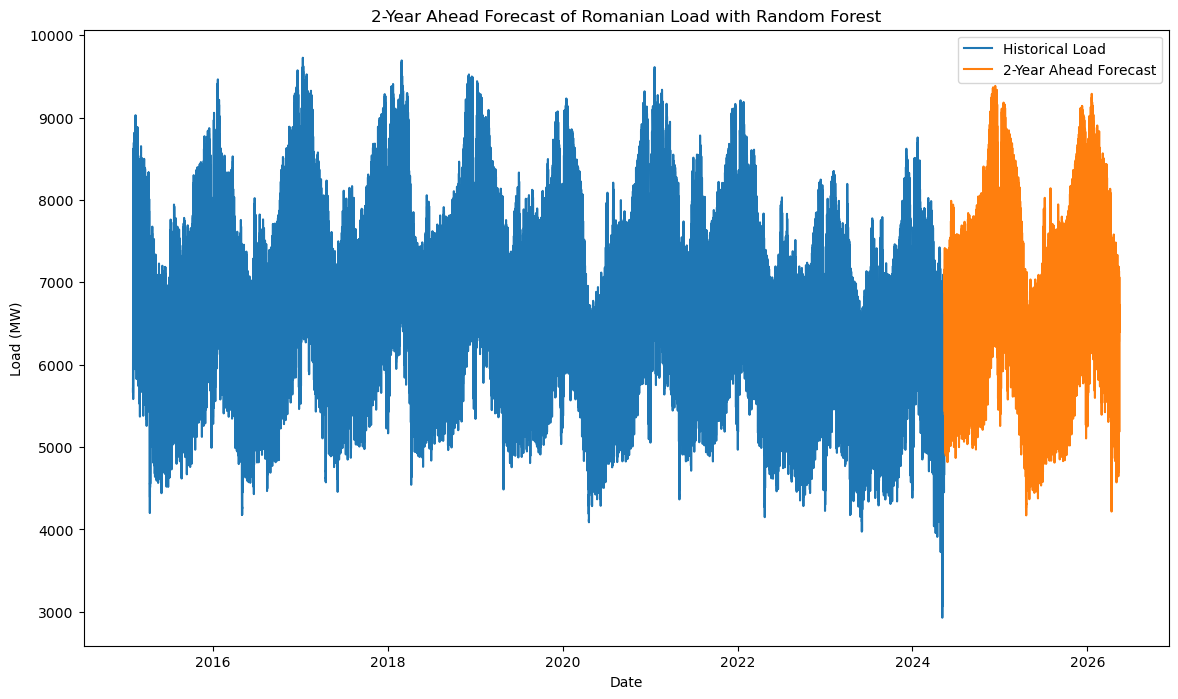

In [29]:
# Créer des caractéristiques temporelles pour les dates futures
future_dates = pd.date_range(start='2024-05-15', end='2026-05-15', freq='H')
future_features = pd.DataFrame({
    'DayOfWeek': future_dates.dayofweek,
    'Hour': future_dates.hour,
    'DayOfYear': future_dates.dayofyear
})

# Faire des prévisions pour les 2 prochaines années
future_forecast = rf_model.predict(future_features)

# Créer un DataFrame pour les prévisions futures
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})

# Visualiser les prévisions futures
plt.figure(figsize=(14, 8))
plt.plot(romania_load['Date'], romania_load['Load'], label='Historical Load')
plt.plot(future_forecast_df['Date'], future_forecast_df['Forecast'], label='2-Year Ahead Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('2-Year Ahead Forecast of Romanian Load with Random Forest')
plt.legend()
plt.show()


# XGBoots Model

In [49]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   -----------------------------

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Préparer les données
features = ['DayOfWeek', 'Hour', 'DayOfYear']
X_train = train_data[features]
y_train = train_data['Load']
X_test = test_data[features]
y_test = test_data['Load']

# Diviser les données d'entraînement pour la validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, shuffle = False , random_state=42)

# Définir et entraîner le modèle XGBoost
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xg_model.fit(X_train_split, y_train_split, eval_set=[(X_val_split, y_val_split)], early_stopping_rounds=10, verbose=True)


[0]	validation_0-rmse:1004.98991
[1]	validation_0-rmse:969.44192
[2]	validation_0-rmse:936.15116
[3]	validation_0-rmse:904.60492
[4]	validation_0-rmse:875.22916
[5]	validation_0-rmse:847.32870
[6]	validation_0-rmse:821.48699
[7]	validation_0-rmse:796.90441
[8]	validation_0-rmse:775.31427
[9]	validation_0-rmse:753.37014
[10]	validation_0-rmse:732.82329
[11]	validation_0-rmse:714.20863
[12]	validation_0-rmse:695.92904
[13]	validation_0-rmse:679.82806
[14]	validation_0-rmse:664.09361
[15]	validation_0-rmse:649.13156
[16]	validation_0-rmse:635.03832
[17]	validation_0-rmse:622.22353
[18]	validation_0-rmse:610.08163
[19]	validation_0-rmse:597.86378
[20]	validation_0-rmse:586.99125
[21]	validation_0-rmse:576.77017
[22]	validation_0-rmse:566.39624
[23]	validation_0-rmse:557.07530
[24]	validation_0-rmse:548.64918


C:\Users\DHajj\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:539.99884
[26]	validation_0-rmse:532.57480
[27]	validation_0-rmse:525.06738
[28]	validation_0-rmse:518.71620
[29]	validation_0-rmse:511.06960
[30]	validation_0-rmse:504.92297
[31]	validation_0-rmse:498.71712
[32]	validation_0-rmse:493.49742
[33]	validation_0-rmse:489.07097
[34]	validation_0-rmse:483.77734
[35]	validation_0-rmse:478.23304
[36]	validation_0-rmse:473.81447
[37]	validation_0-rmse:468.18059
[38]	validation_0-rmse:463.17061
[39]	validation_0-rmse:459.18276
[40]	validation_0-rmse:454.73038
[41]	validation_0-rmse:451.03345
[42]	validation_0-rmse:447.10076
[43]	validation_0-rmse:443.87866
[44]	validation_0-rmse:441.04888
[45]	validation_0-rmse:437.72849
[46]	validation_0-rmse:434.68626
[47]	validation_0-rmse:432.04118
[48]	validation_0-rmse:429.38173
[49]	validation_0-rmse:427.17526
[50]	validation_0-rmse:424.87680
[51]	validation_0-rmse:422.23428
[52]	validation_0-rmse:419.92025
[53]	validation_0-rmse:418.17560
[54]	validation_0-rmse:416.11739
[55]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

C:\Users\DHajj\AppData\Local\Temp\ipykernel_4232\2241180069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast'] = xg_model.predict(X_test)


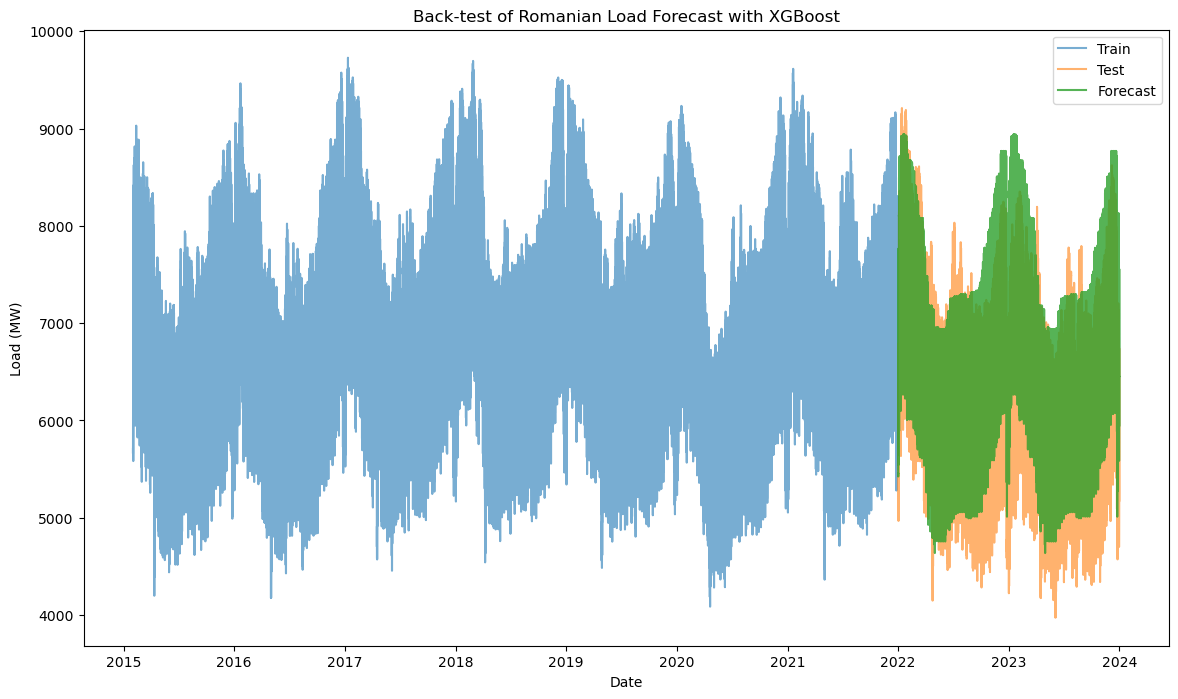

In [32]:

# Faire des prévisions sur les données de test
test_data['Forecast'] = xg_model.predict(X_test)

# Visualiser les résultats
plt.figure(figsize=(14, 8))
plt.plot(train_data['Date'], train_data['Load'], label='Train', alpha=0.6)
plt.plot(test_data['Date'], test_data['Load'], label='Test', alpha=0.6)
plt.plot(test_data['Date'], test_data['Forecast'], label='Forecast', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Back-test of Romanian Load Forecast with XGBoost')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculer les métriques de performance
mse = round(mean_squared_error(y_test, test_data['Forecast']))
rmse = round(np.sqrt(mse))
mae = round(mean_absolute_error(y_test, test_data['Forecast']))
mape = np.mean(np.abs((y_test - test_data['Forecast']) / y_test)) * 100
mape_rounded = round(mape,2)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape_rounded}%')

Mean Squared Error: 453167
Root Mean Squared Error: 673
Mean Absolute Error: 558
Mean Absolute Percentage Error: 9.39%


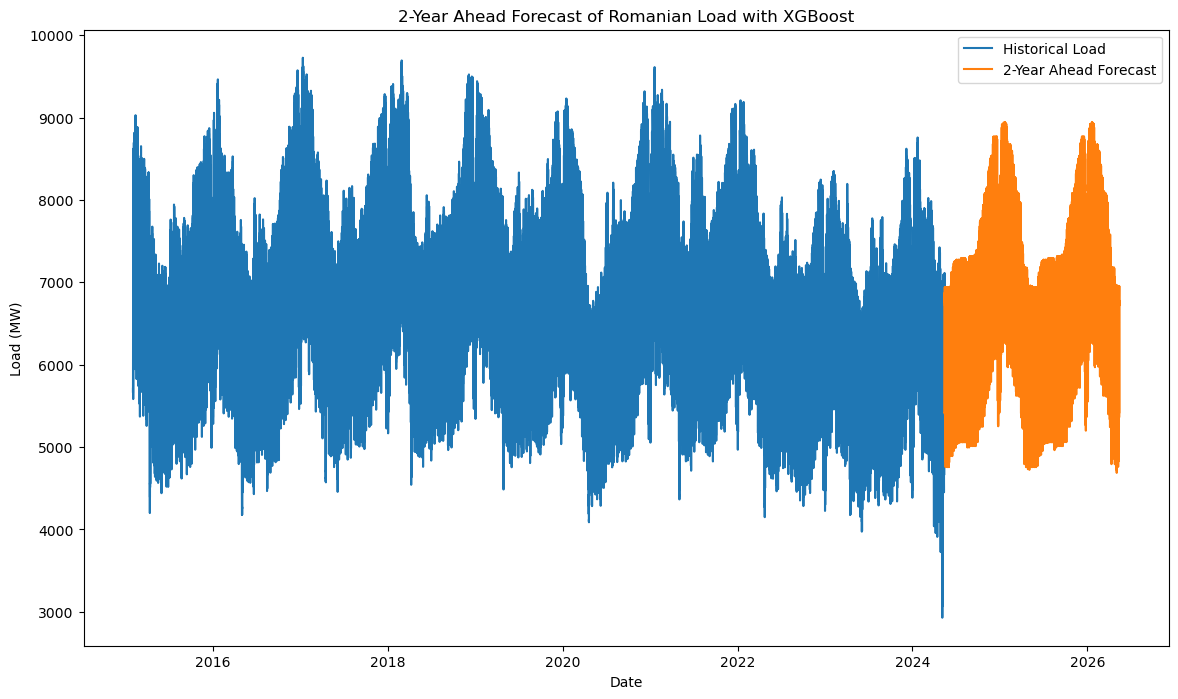

In [34]:
# Créer des caractéristiques temporelles pour les dates futures
future_dates = pd.date_range(start='2024-05-15', end='2026-05-15', freq='H')
future_features = pd.DataFrame({
    'DayOfWeek': future_dates.dayofweek,
    'Hour': future_dates.hour,
    'DayOfYear': future_dates.dayofyear
})

# Faire des prévisions pour les 2 prochaines années
future_forecast = xg_model.predict(future_features)

# Créer un DataFrame pour les prévisions futures
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})

# Visualiser les prévisions futures
plt.figure(figsize=(14, 8))
plt.plot(romania_load['Date'], romania_load['Load'], label='Historical Load')
plt.plot(future_forecast_df['Date'], future_forecast_df['Forecast'], label='2-Year Ahead Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('2-Year Ahead Forecast of Romanian Load with XGBoost')
plt.legend()
plt.show()


# C : Hungarian Solar Generation Forecast

In [35]:
import pandas as pd

capacity_df = pd.read_excel('hungary_solar_installed_capacity.xlsx')
capacity_df.rename(columns={'hu - Industrial capacity observed and fcst ': 'InstalledCapacity'}, inplace=True)


entsoe_df['Date'] = pd.to_datetime(entsoe_df['Date'])
capacity_df['Date'] = pd.to_datetime(capacity_df['Date'])

# Filtrer les dates de 2021 à 2023
solar_df = entsoe_df[['Date', 'power.hu.generation.solar.mw.hourly.entsoe.obs.utc']].copy()
solar_df.rename(columns={'power.hu.generation.solar.mw.hourly.entsoe.obs.utc': 'SolarGeneration'}, inplace=True)
solar_df = solar_df[(solar_df['Date'].dt.year >= 2021) & (solar_df['Date'].dt.year <= 2023)]

print(solar_df.head())
print(capacity_df.head())


                           Date  SolarGeneration
52607 2021-01-01 00:00:00+00:00              0.0
52608 2021-01-01 01:00:00+00:00              0.0
52609 2021-01-01 02:00:00+00:00              0.0
52610 2021-01-01 03:00:00+00:00              0.0
52611 2021-01-01 04:00:00+00:00              0.0
        Date  InstalledCapacity
0 2020-01-31             943.90
1 2020-02-29             987.42
2 2020-03-31            1011.18
3 2020-04-30            1040.95
4 2020-05-31            1077.77


In [36]:
# Agréger la capacité par mois
capacity_df.set_index('Date', inplace=True)
capacity_monthly = capacity_df.resample('M').last().reset_index()

capacity_monthly['Month'] = capacity_monthly['Date'].dt.to_period('M')

print(capacity_monthly.head())


        Date  InstalledCapacity    Month
0 2020-01-31             943.90  2020-01
1 2020-02-29             987.42  2020-02
2 2020-03-31            1011.18  2020-03
3 2020-04-30            1040.95  2020-04
4 2020-05-31            1077.77  2020-05


In [37]:
# Ajouter une colonne de période mensuelle pour la fusion
solar_df['Month'] = solar_df['Date'].dt.to_period('M')
solar_df.head()

C:\Users\DHajj\AppData\Local\Temp\ipykernel_4232\349972308.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  solar_df['Month'] = solar_df['Date'].dt.to_period('M')


,Date,SolarGeneration,Month
52607,2021-01-01 00:00:00+00:00,0.0,2021-01
52608,2021-01-01 01:00:00+00:00,0.0,2021-01
52609,2021-01-01 02:00:00+00:00,0.0,2021-01
52610,2021-01-01 03:00:00+00:00,0.0,2021-01
52611,2021-01-01 04:00:00+00:00,0.0,2021-01


In [38]:
# Fusionner les données de génération solaire avec les données de capacité installée
merged_df = solar_df.merge(capacity_monthly, left_on='Month', right_on='Month', suffixes=('', '_capacity'))

# Calculer le Load Factor
merged_df['LoadFactor'] = merged_df['SolarGeneration'] / merged_df['InstalledCapacity']

# Extraire le mois et l'heure pour le groupement
merged_df['Hour'] = merged_df['Date'].dt.hour
merged_df['Month'] = merged_df['Date'].dt.month

# Vérifier les données fusionnées
print(merged_df.head())


                       Date  SolarGeneration  Month Date_capacity  \
0 2021-01-01 00:00:00+00:00              0.0      1    2021-01-31   
1 2021-01-01 01:00:00+00:00              0.0      1    2021-01-31   
2 2021-01-01 02:00:00+00:00              0.0      1    2021-01-31   
3 2021-01-01 03:00:00+00:00              0.0      1    2021-01-31   
4 2021-01-01 04:00:00+00:00              0.0      1    2021-01-31   

   InstalledCapacity  LoadFactor  Hour  
0            1435.13         0.0     0  
1            1435.13         0.0     1  
2            1435.13         0.0     2  
3            1435.13         0.0     3  
4            1435.13         0.0     4  


In [39]:
# Créer une table pivot pour former la matrice du Load Factor
load_factor_matrix = merged_df.pivot_table(index='Month', columns='Hour', values='LoadFactor', aggfunc='mean')

# Afficher la matrice du Load Factor
print(load_factor_matrix)


Hour             0             1             2             3             4   \
Month                                                                         
1      1.913365e-07  1.543903e-07  1.705931e-07  1.381875e-07  2.125962e-07   
2      1.169335e-08  2.041087e-08  0.000000e+00  0.000000e+00  8.185342e-08   
3      1.022080e-07  3.066239e-08  5.110399e-08  1.090163e-06  1.520894e-03   
4      2.901073e-08  1.934049e-08  2.901073e-08  8.455390e-04  2.793881e-02   
5      2.040897e-07  2.721196e-07  6.799169e-05  1.249245e-02  7.459118e-02   
6      2.775095e-08  3.700127e-08  5.676620e-04  2.297846e-02  9.473386e-02   
7      1.507926e-07  3.918190e-07  8.913393e-05  1.371205e-02  7.426966e-02   
8      9.387057e-08  4.305070e-08  6.027099e-08  1.992959e-03  3.866581e-02   
9      6.153862e-07  4.610119e-07  5.902684e-07  5.737688e-06  9.963266e-03   
10     3.647778e-06  5.752061e-06  9.567899e-06  1.323250e-05  3.829674e-04   
11     9.032947e-07  6.525484e-07  5.498182e-07  7.9

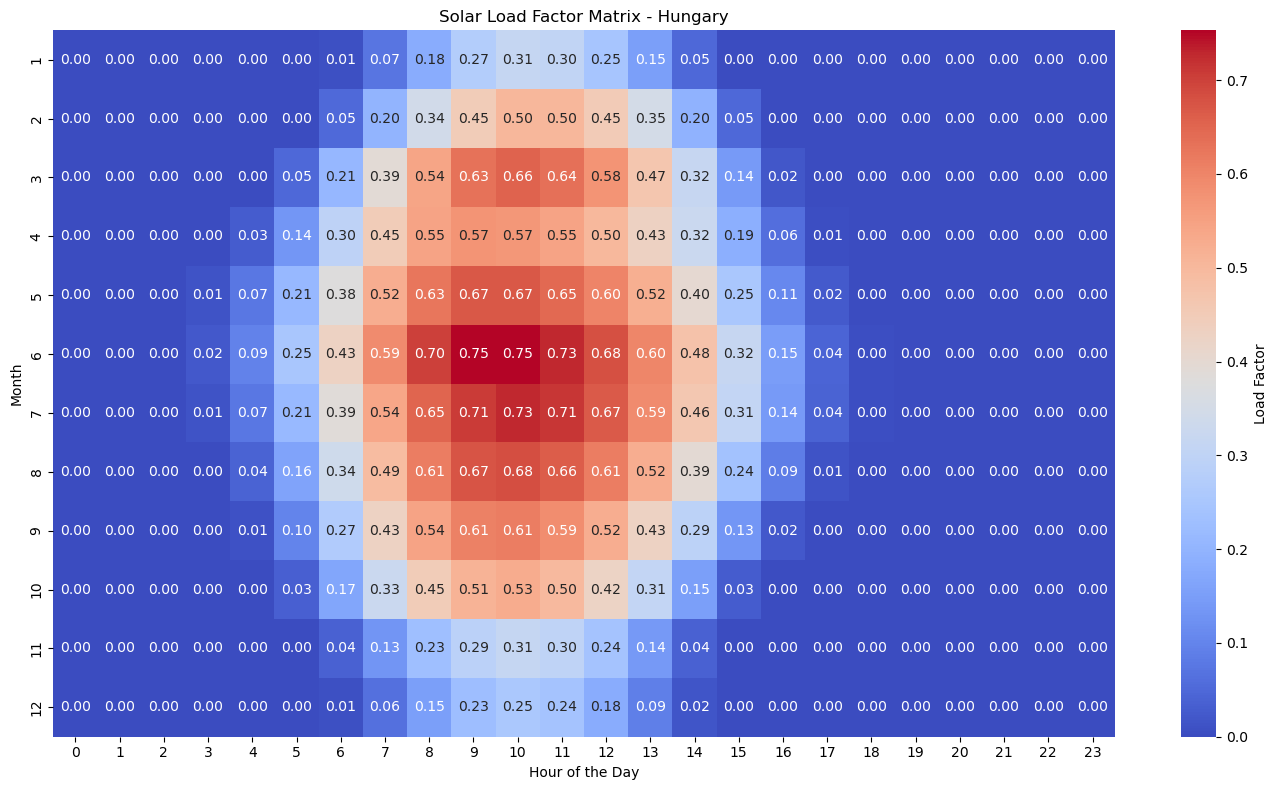

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(load_factor_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Load Factor'})
plt.title('Solar Load Factor Matrix - Hungary')
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.tight_layout()
plt.show()



In [41]:
# Charger les projections de capacité
projection_df = pd.read_excel('hungary_solar_installed_capacity.xlsx')
projection_df.rename(columns={'hu - Industrial capacity observed and fcst ': 'InstalledCapacity'}, inplace=True)

# Convertir les colonnes de date en datetime
projection_df['Date'] = pd.to_datetime(projection_df['Date'])

# Assurer que les données de capacité sont disponibles pour chaque mois en 2024 et 2025
projection_df.set_index('Date', inplace=True)
projection_monthly = projection_df.resample('M').last().reset_index()

# Ajouter une colonne de période mensuelle
projection_monthly['Month'] = projection_monthly['Date'].dt.to_period('M')

#Sélectionner uniquement 2024 et 2025
projection_monthly = projection_monthly[(projection_monthly['Month'].dt.year >= 2024) & (projection_monthly['Month'].dt.year <= 2025)]
# Vérifier les projections de capacité
print(projection_monthly.head())


         Date  InstalledCapacity    Month
48 2024-01-31        3375.825246  2024-01
49 2024-02-29        3449.950493  2024-02
50 2024-03-31        3524.075739  2024-03
51 2024-04-30        3598.200986  2024-04
52 2024-05-31        3672.326232  2024-05


In [42]:
# Créer un DataFrame pour la génération prévue
future_dates = pd.date_range(start='2024-01-01', end='2025-12-31', freq='H')
future_df = pd.DataFrame({'Date': future_dates})

# Extraire le mois et l'heure
future_df['Month'] = future_df['Date'].dt.month
future_df['Hour'] = future_df['Date'].dt.hour

# Ajouter une colonne de période mensuelle pour la fusion
future_df['MonthPeriod'] = future_df['Date'].dt.to_period('M')

# Fusionner avec les projections de capacité
future_df = future_df.merge(projection_monthly, left_on='MonthPeriod', right_on='Month', suffixes=('', '_capacity'))

# Calculer le Load Factor prévu en utilisant la matrice du Load Factor
future_df['LoadFactor'] = future_df.apply(lambda row: load_factor_matrix.loc[row['Month'], row['Hour']], axis=1)
future_df['ForecastedGeneration'] = future_df['LoadFactor'] * future_df['InstalledCapacity']

# Vérifier les données prévues
print(future_df.head())


                 Date  Month  Hour MonthPeriod Date_capacity  \
0 2024-01-01 00:00:00      1     0     2024-01    2024-01-31   
1 2024-01-01 01:00:00      1     1     2024-01    2024-01-31   
2 2024-01-01 02:00:00      1     2     2024-01    2024-01-31   
3 2024-01-01 03:00:00      1     3     2024-01    2024-01-31   
4 2024-01-01 04:00:00      1     4     2024-01    2024-01-31   

   InstalledCapacity Month_capacity    LoadFactor  ForecastedGeneration  
0        3375.825246        2024-01  1.913365e-07              0.000646  
1        3375.825246        2024-01  1.543903e-07              0.000521  
2        3375.825246        2024-01  1.705931e-07              0.000576  
3        3375.825246        2024-01  1.381875e-07              0.000466  
4        3375.825246        2024-01  2.125962e-07              0.000718  


In [43]:
future_df.iloc[76:100]

,Date,Month,Hour,MonthPeriod,Date_capacity,InstalledCapacity,Month_capacity,LoadFactor,ForecastedGeneration
76,2024-01-04 04:00:00,1,4,2024-01,2024-01-31,3375.825246,2024-01,2.125962e-07,0.000718
77,2024-01-04 05:00:00,1,5,2024-01,2024-01-31,3375.825246,2024-01,1.537945e-06,0.005192
78,2024-01-04 06:00:00,1,6,2024-01,2024-01-31,3375.825246,2024-01,6.959689e-03,23.494695
79,2024-01-04 07:00:00,1,7,2024-01,2024-01-31,3375.825246,2024-01,7.221990e-02,243.801758
80,2024-01-04 08:00:00,1,8,2024-01,2024-01-31,3375.825246,2024-01,1.821918e-01,615.047614
81,2024-01-04 09:00:00,1,9,2024-01,2024-01-31,3375.825246,2024-01,2.717901e-01,917.515858
82,2024-01-04 10:00:00,1,10,2024-01,2024-01-31,3375.825246,2024-01,3.139747e-01,1059.923669
83,2024-01-04 11:00:00,1,11,2024-01,2024-01-31,3375.825246,2024-01,3.044300e-01,1027.702371
84,2024-01-04 12:00:00,1,12,2024-01,2024-01-31,3375.825246,2024-01,2.470633e-01,834.042664
85,2024-01-04 13:00:00,1,13,2024-01,2024-01-31,3375.825246,2024-01,1.516278e-01,511.869037


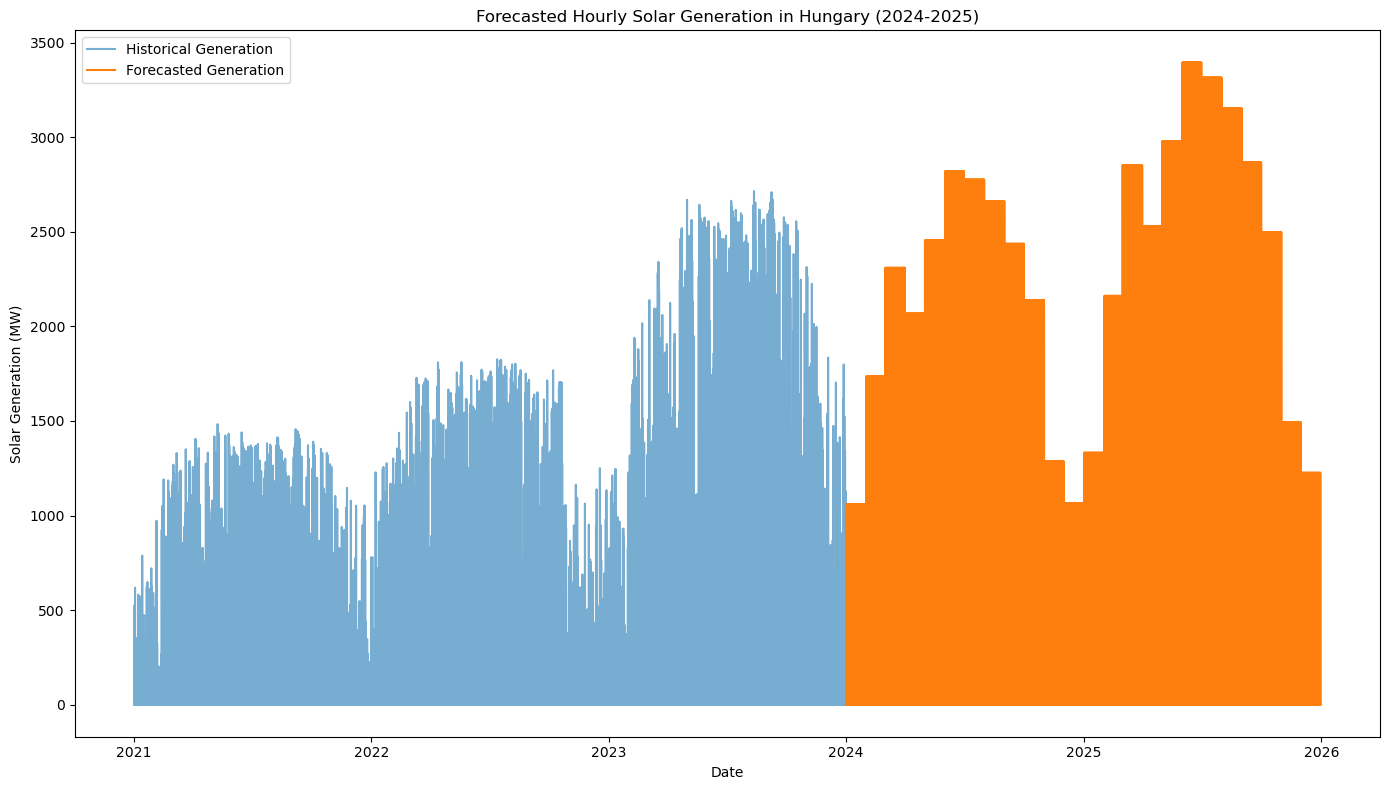

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Date'], merged_df['SolarGeneration'], label='Historical Generation', alpha=0.6)
plt.plot(future_df['Date'], future_df['ForecastedGeneration'], label='Forecasted Generation')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MW)')
plt.title('Forecasted Hourly Solar Generation in Hungary (2024-2025)')
plt.legend()
plt.tight_layout()
plt.show()
